Plan:
* Use linspace to produce a bunch of values at some intervals
* SMARTLY restrict values
* Try and make it make sense
* Code equations first!
* Could brute force with REAL values (restrict to range) or CALCULATE values (use equations from geometry)

## Problem 2
* Diameter - 1 Meter
* Propulsion Stack Length - 10 Meters
* 3 Stages, Same ISP, Solid Rocket Motors
* 250 kg Payload


__UNIQUE restriction:__
* _First Stage Booster - Burns for 10 Seconds_

## Equations
With credit to tables from _Design of Rockets and Space Launch Vehicles_
* Change in velocity: $$\Delta v = v_{e}ln(\frac{m_0}{m_f})$$
    * $g_0$ is Earth's standard gravity at sea level. Taken to be 9.80665 $m/s^2$
<br /><br />
* Time to Burn Equation: $$\Delta V = -g_0 t + v_e ln\frac{m_0}{m_f} =-g_0 t + v_e ln(\mu) $$
* Mass fraction: $$\mu = \frac{initial\ mass}{final\ mass} = \frac{m_0}{m_f} = \frac{m_0}{m_0-m_p}$$ 
<br />
* Total Launch Weight (Propellant and shell - NOT payload):
$W_L = 0.04 Ld^2$
    
    * NOTE: lb, in, in
    * Can be used to calculate masses instead of using values
<br /><br />
* Body Structure vs. Launch Weight: $$W_{Body Structure}/W_{Launch Weight} = 0.22$$
    * Launch weight includes the propellant
    * Combine with Total launch weight equations

### SM3 Mass Fractions (Mf/Mo)
* First Stage: .376
* Second Stage: .612
* Third Stage: .604

### Range of Real Mass Fractions (Mf/Mo)
With credit to tables from _Design of Rockets and Space Launch Vehicles_
* First Stage: 
    * 0.0432 -> 0.1198
* Second Stage:
    * 0.0495 -> 0.1700
* Third Stage:
    * 0.0824 -> 0.1008

### Range of Isps
With credit to tables from _Design of Rockets and Space Launch Vehicles_
* 200 seconds to 250 seconds 
    * 250 seconds more applicable

### Project Restrictions
* Mass fractions ($m_0$ / $m_f$) between 1.25 and 10
* Mass fractions ($m_f$ / $m_0$) between .1 and .8

In [95]:
import numpy as np


In [96]:
specific_impulse = 250 # seconds
g = 9.80665 # m / s^2
v_eq = g*specific_impulse

meters_to_inches = 39.3700787402 ## multiply to meters
kg_to_lbs = 2.20462

payload = 250 * kg_to_lbs  ## in lbs

min_mf = 1.25 ## or .8
max_mf = 10 ## or .1


## Calculating Delta V using range of actual values

Note: some of the ranges are capped due to the project restriction

In [97]:
#m0 / mf
mass_frac_first = 1/np.linspace(1/min_mf, 0.1200)  ## floor capped at .1 (.04 originally)
mass_frac_second = 1/np.linspace(1/min_mf, 0.1700) ## floor capped at .1 (.0450 originally)
mass_frac_third = 1/np.linspace(1/min_mf, 0.1010) ## floor capped at .1 (.0800 originally)



In [98]:
max_mf1 = np.max(mass_frac_first)
max_mf2 = np.max(mass_frac_second)
max_mf3 = np.max(mass_frac_third)

In [99]:
deltav_first = np.log(mass_frac_first) * v_eq - g*10
deltav_second = np.log(mass_frac_second) * v_eq
deltav_third = np.log(mass_frac_third) * v_eq
deltav_total_max = np.max(deltav_first)+np.max(deltav_second)+np.max(deltav_third)

In [100]:
print(
"Unitless values.\nMax Mass Fraction\n"
    "\tFirst: ", max_mf1, "\n\tSecond: ", max_mf2, "\n\tThird: ", max_mf3)
print(
"\n\nUnits in meters per second.\nMax Delta V\n",
    "\tFirst: ", np.max(deltav_first), "\n\tSecond: ", np.max(deltav_second), "\n\tThird: ", np.max(deltav_third),
"\n\nTotal Delta V: ", deltav_total_max)

Unitless values.
Max Mass Fraction
	First:  8.333333333333334 
	Second:  5.88235294117647 
	Third:  9.900990099009901


Units in meters per second.
Max Delta V
 	First:  5100.104101819155 
	Second:  4344.240140982806 
	Third:  5620.766672537209 

Total Delta V:  15065.110915339172


## Calculating Delta V with Mass Equations

In [101]:
## Constants given in project

total_length = 10.0 * 39.3700787402
diameter = 1.0 * 39.3700787402 ## convert given meters to inches (final unit inches)

In [102]:
launch_weight = 0.04 * total_length * (diameter)*(diameter) ## pounds

In [103]:
print(launch_weight, "lbs")
print(launch_weight/2.205, "kg")

24409.497637972003 lbs
11070.066955996374 kg


In [104]:
## Lengths in ratio form
l1_ratio = np.linspace(0.1, 1, 100)
l2_ratio = np.linspace(0.1, 1, 100)
print(np.round(l1_ratio*10, 1)) ## lengths corresponding to l1's ratio, rounded to tenths

[ 1.   1.1  1.2  1.3  1.4  1.5  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2
  2.3  2.4  2.5  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5
  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.5  4.6  4.7
  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.5  5.6  5.7  5.8  5.9  6.
  6.1  6.2  6.3  6.4  6.5  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3
  7.4  7.5  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.5
  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.5  9.6  9.7  9.8
  9.9 10. ]


In [105]:
## Create new data type to hold a tuple in each element of the array (makes adding elements easier)
##length 1 ratio, length 2 ratio, length 3 ratio
dt = np.dtype([('l1r', np.float64), ('l2r', np.float64), ('l3r', np.float64)])

## Test dt to make sure it works as expected

test = np.array([(1,2,3), (1,3,4)], dtype = dt)

print(test)
np.append(test, np.array([(4.,4.,2.)], dtype = dt))


[(1., 2., 3.) (1., 3., 4.)]


array([(1., 2., 3.), (1., 3., 4.), (4., 4., 2.)],
      dtype=[('l1r', '<f8'), ('l2r', '<f8'), ('l3r', '<f8')])

In [106]:
## Find all possible ratio combos between the three stages, put it in an np array of tuples
ratio_list = np.array([], dtype=dt )

for i in l1_ratio:
    for j in l2_ratio:
        if(i+j > 1):
            continue
        else:
            ratio_list = np.append(ratio_list, np.array([(i, j, 1-i-j)], dtype = dt)) 
    
    
    

In [107]:
## convert the np array of tuples to a more useful np array of 3 columns and each row representing a tuple of 
## the ratios
ratio_list_converted = np.array([])
for i in ratio_list:
    ratio_list_converted = np.append(ratio_list_converted, np.array([[i[0], i[1], i[2]]]))
    
ratio_list_converted = np.reshape(ratio_list_converted, (-1, 3)).astype(np.float64)

##np.set_printoptions(threshold=np.inf) - to see ENTIRE list
print(np.round(ratio_list_converted*10, 2), "\n")
print(ratio_list_converted.shape)

## 4005 different combinations!

[[1.   1.   8.  ]
 [1.   1.09 7.91]
 [1.   1.18 7.82]
 ...
 [8.91 1.   0.09]
 [8.91 1.09 0.  ]
 [9.   1.   0.  ]] 

(4005, 3)


In [108]:
##now we calculate masses

launch_weights = 0.04 * (10 * ratio_list_converted * meters_to_inches) * diameter * diameter + payload ## lbs 

final_masses = launch_weights*.22 + payload ## after losing the propellant

In [109]:
test1 = np.array([[0, 2], [4,5]])
print(np.sum(test1, axis = 1))

[2 9]


In [122]:
## now mass fractions - m0/mf

stage_1_mf = np.sum(launch_weights, axis = 1)/(np.sum(launch_weights[:, 1:2], axis=1) + final_masses[:, 0])

stage_2_mf = np.sum(launch_weights[:, 1:2], axis = 1)/(launch_weights[:, 2] + final_masses[:, 1])

stage_3_mf = launch_weights[:, 2]/final_masses[:, 2]

## Calculate mass fractions by taking initial launch weight / final masses of the lowest stage

mass_fractions = np.stack((stage_1_mf, stage_2_mf, stage_3_mf), axis = 1)

print(mass_fractions.shape)

print(mass_fractions[:, 0])
print(stage_1_mf)
print(np.max(mass_fractions[:,0]))
print(np.min(mass_fractions[:,0]))

print(mass_fractions[:, 1])
print(stage_2_mf)
print(np.max(mass_fractions[:,1]))
print(np.min(mass_fractions[:,1]))

print(mass_fractions[:, 2])
print(stage_3_mf)
print(np.max(mass_fractions[:,2]))
print(np.min(mass_fractions[:,2]))


## Based on the maxes and minimums, there are mass fractions that fall below our restricted range 
## ex. 1.25 > min for all stages' mass fraction 



(4005, 3)
[6.20321817 5.89202911 5.61057066 ... 3.08482134 3.005873   3.06709893]
[6.20321817 5.89202911 5.61057066 ... 3.08482134 3.005873   3.06709893]
6.203218167606256
1.098353484033931
[0.14055246 0.15221389 0.16406808 ... 1.50927547 1.77629237 1.69950617]
[0.14055246 0.15221389 0.16406808 ... 1.50927547 1.77629237 1.69950617]
3.7181813101612256
0.1405524571148863
[4.04122596 4.03622237 4.03111849 ... 1.07186552 0.81967213 0.81967213]
[4.04122596 4.03622237 4.03111849 ... 1.07186552 0.81967213 0.81967213]
4.0412259574427365
0.819672131147541


In [123]:
## Logic to find rows that are out of the domain

acceptable_rows = (mass_fractions[:, 0] >= 1.25) & (mass_fractions[:, 1] >= 1.25) & (mass_fractions[:, 2] >= 1.25)

print(acceptable_rows, acceptable_rows.shape)

[False False False ... False False False] (4005,)


In [124]:
## now remove rows with mass fractions < 1.25

mass_fractions = mass_fractions[acceptable_rows]

print(mass_fractions.shape)
print(acceptable_rows.shape[0]-mass_fractions.shape[0])

## 2631 possible options removed


(1374, 3)
2631


In [125]:
## now delta vs

delta_v = np.log(mass_fractions) * v_eq
print(delta_v[:, 0])
print(np.max(delta_v[:,0]))
delta_v[:, 0] = delta_v[:, 0] - g*10
print(delta_v[:, 0])

## note - there will be negative delta_vs, but we ignore those in the final output

## and quickly sum for total delta vs
delta_v_three = delta_v ## all three, to check negative
delta_v = np.sum(delta_v, axis = 1)



[1168.14232604 1134.75584277 1101.81791164 ... 2676.98063897 2725.98546348
 2775.98982949]
2775.9898294891173
[1070.07582604 1036.68934277 1003.75141164 ... 2578.91413897 2627.91896348
 2677.92332949]


In [126]:
## Now find best performing mass fractions

print(np.max(delta_v))
print(np.argmax(delta_v))
print("^ Best:", delta_v_three[np.argmax(delta_v), :])
print(np.min(delta_v))
print(np.argmin(delta_v))
print("^ Worst:", delta_v_three[np.argmin(delta_v), :])


best_performing_index = np.argmax(delta_v)

print(mass_fractions[best_performing_index, :])
print(delta_v_three[best_performing_index, :]) ## nonnegative!


5111.747027326783
971
^ Best: [1422.28721389 1468.65129159 2220.80852185]
4027.9222101309
387
^ Worst: [ 468.05103964 2931.62055771  628.25061278]
[1.85917294 1.82037589 2.47400373]
[1422.28721389 1468.65129159 2220.80852185]


In [127]:
# Find the indices that would sort delta_v in descending order
sorted_indices = np.argsort(delta_v)[::-1]

# Select how many top-performing configurations you want to see
top_n = 100

# Print top 10 delta-v values
print("Top 10 delta-v values:")
for idx in sorted_indices[:10]:
    print(delta_v[idx])

# Print top 100 delta-v values and their corresponding mass fractions
print("\nTop 100 delta-v values and their corresponding mass fractions:")
for idx in sorted_indices[:top_n]:
    print(delta_v[idx])
    print(mass_fractions[idx])
    print(delta_v_three[idx])

Top 10 delta-v values:
5111.747027326783
5111.546389425561
5111.44553677942
5110.873576122227
5110.609709361528
5109.756475674914
5109.532825982593
5109.398319570724
5109.204869074669
5109.143956091979

Top 100 delta-v values and their corresponding mass fractions:
5111.747027326783
[1.85917294 1.82037589 2.47400373]
[1422.28721389 1468.65129159 2220.80852185]
5111.546389425561
[1.83649794 1.84270102 2.47400373]
[1392.20221118 1498.53565639 2220.80852185]
5111.44553677942
[1.88241487 1.79767887 2.47400373]
[1452.74598907 1437.89102586 2220.80852185]
5110.873576122227
[1.81436938 1.86466333 2.47400373]
[1362.48191862 1527.58313566 2220.80852185]
5110.609709361528
[1.90624525 1.77460059 2.47400373]
[1483.58794111 1406.2132464  2220.80852185]
5109.756475674914
[1.79276775 1.88627159 2.47400373]
[1333.11759948 1555.83035434 2220.80852185]
5109.532825982593
[1.87580082 1.86841486 2.38687102]
[1444.11666958 1532.51070033 2132.90545606]
5109.398319570724
[1.89946299 1.84503824 2.38687102]
[14

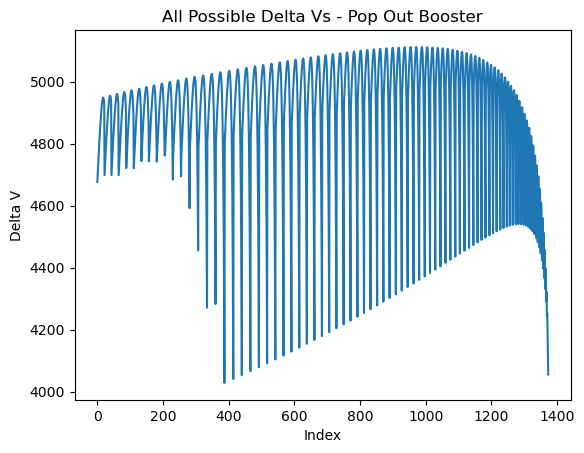

In [130]:
## Graph all delta vs to find where local maximums are

import matplotlib.pyplot as plt

x = np.arange(delta_v.shape[0])
y = delta_v

# Create the plot
plt.plot(x, y)

# Add labels and title
plt.xlabel("Index")
plt.ylabel("Delta V")
plt.title("All Possible Delta Vs - Pop Out Booster")

# Display the plot
plt.show()

18


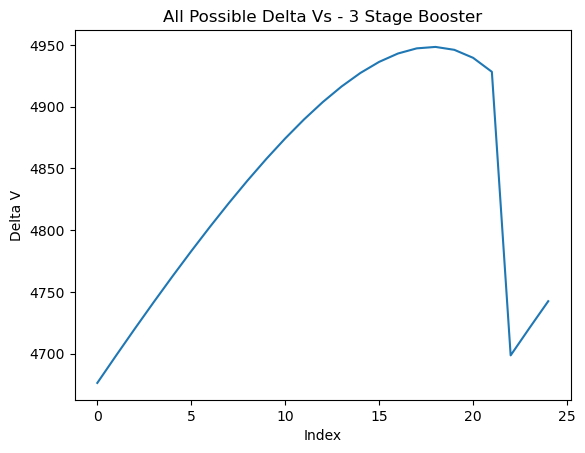

In [131]:
## Restrict domain to find peaks

end = 25 ## end of domain

x = np.arange(delta_v.shape[0])[0:end]
y = delta_v[0:end]

print(np.argmax(delta_v[0:end+2]))

## based on this, peak is potentially about every 18 indices
peak = 18

# Create the plot
plt.plot(x, y)

# Add labels and title
plt.xlabel("Index")
plt.ylabel("Delta V")
plt.title("All Possible Delta Vs - 3 Stage Booster")

# Display the plot
plt.show()

In [132]:
## Methodology:
## Look through "frames" of the data every 20 indices, find the maximum within that frame
## Collect all the maximums of each frame, graph them compare to the full graph (as a check)

frame_length = 25 ## adjusted with iterations until curve smoothed out - more or less is worse

local_max_indices = np.array([])
local_maxes = np.array([])

frame_start = 0

while(frame_start < len(delta_v)):
    local_max_indices = np.append(local_max_indices, np.argmax(delta_v[frame_start:frame_start + frame_length])+frame_start)
    local_maxes = np.append(local_maxes, np.max(delta_v[frame_start:frame_start + frame_length]))
    frame_start += frame_length
    
print(local_max_indices)
print(local_maxes)
print(delta_v[18]) ## verification that indices match to delta_v - correct!

[  18.   39.   60.   82.  104.  149.  173.  197.  221.  246.  271.  296.
  322.  348.  374.  375.  402.  428.  454.  480.  505.  530.  555.  580.
  604.  649.  673.  695.  717.  739.  761.  782.  822.  842.  861.  899.
  918.  936.  971.  988. 1004. 1037. 1052. 1082. 1110. 1125. 1151. 1175.
 1210. 1231. 1250. 1277. 1301. 1327. 1351.]
[4948.44894836 4954.31867485 4960.10425896 4965.80148965 4971.40595265
 4982.31783202 4988.06870277 4993.68592585 4999.19381966 5004.58681222
 5009.85904636 5015.00436227 5020.01627889 5024.8879738  5029.61226172
 5029.7988978  5034.89148001 5039.83326487 5044.61633577 5049.23233932
 5053.67245618 5057.92736981 5061.98723252 5065.92994545 5070.21309424
 5076.05848676 5081.74819421 5085.11413046 5088.21813066 5091.04550427
 5093.88243315 5096.92293732 5102.08009229 5104.16043816 5105.88239344
 5108.16424209 5109.75647567 5110.87357612 5111.74702733 5111.44553678
 5110.60970936 5108.70601145 5107.41877884 5102.89594297 5095.4679917
 5091.61024695 5082.601007

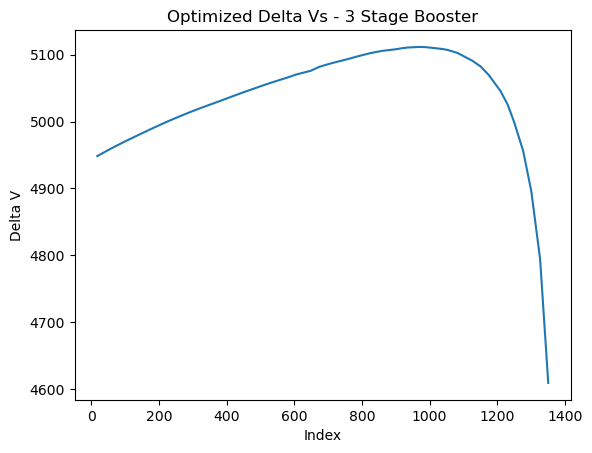

In [133]:
## Graph maximums vs their indices

# Create the plot
plt.plot(local_max_indices, local_maxes)

# Add labels and title
plt.xlabel("Index")
plt.ylabel("Delta V")
plt.title("Optimized Delta Vs - Pop Out Booster")

# Display the plot
plt.show()
